In [1]:
import torch
import torch_geometric
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [4]:
from torch_geometric.datasets import TUDataset

In [14]:
from torch_geometric.data import Data

In [5]:
def get_adj_list(adj):
    adj = adj[0]
    n = adj.shape[0]
    adj_list = dict((k, []) for k in range(n))
    pos_x, pos_y = np.where(adj != 0)
    for i in range(len(pos_x)):
        adj_list[pos_x[i]].append(pos_y[i])
    return adj_list

In [6]:
def get_features(i, adj_list, degree):
    DN = []
    for k in adj_list[i]:
        DN.append(degree[k])
    DN = np.array(DN)
    return degree[i].item(), np.min(DN), np.max(DN), np.mean(DN), np.std(DN)

In [7]:
def get_nodes_feature(adj):
    n = adj[0].shape[0]
    adj_list = get_adj_list(adj)
    adj = adj[0]
    node_deg = dict()
    degree = torch.sum(adj, axis = 1)
    node_feature = []
    for i in range(n):
        node_feature.append([*get_features(i, adj_list, degree)])    
    return torch.tensor(node_feature)

In [8]:
class GraphDataset(torch.utils.data.Dataset):
    
    def __init__(self, dataset):
        self.DS = TUDataset(root = '/tmp/folder', name = dataset)
        self.features = self.DS[0].x.shape[1]
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        graph = self.DS[idx]
        edge_index = graph.edge_index
        adjacency_matrix = torch_geometric.utils.to_dense_adj(edge_index)
        
        item = {}
        
        item['graph'] = graph
        item['adjacency_matrix'] = adjacency_matrix
        item['node_features'] = get_nodes_feature(adjacency_matrix)
        item['edge_weights'] = adjacency_matrix
        
        return item

In [9]:
DS = GraphDataset('PROTEINS')

In [10]:
item = DS[2]

In [18]:
# Da riscrivere 
def reduce_graph():
    edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
    edge_index = torch_geometric.utils.to_dense_adj(edge_index)
    mapping = dict()
    mapping[0] = [0,1,2,9]
    mapping[1] = [3,4,5]
    mapping[2] = [6,7,8]
    return edge_index, mapping

In [19]:
reduce_graph()

(tensor([[[0., 1., 0.],
          [1., 0., 0.],
          [0., 0., 0.]]]), {0: [0, 1, 2, 9], 1: [3, 4, 5], 2: [6, 7, 8]})

In [51]:
def get_subgraph(super_node_list_1, super_node_list_2, item):
    node_list = super_node_list_1 + super_node_list_2
    node_list.sort()
    x = item['node_features'][node_list]
    #data = Data(x = x, edge_index = edge_index.t().contiguous())
    return x

In [82]:
item['adjacency_matrix'][0][[0,2],:][:,[0,2]]

tensor([[0., 1.],
        [1., 0.]])

In [64]:
torch_geometric.utils.dense_to_sparse(item['adjacency_matrix'][0])[0]

tensor([[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6,
         6, 7, 7, 7, 8, 8, 8, 9, 9, 9],
        [1, 2, 9, 0, 2, 9, 0, 1, 3, 9, 2, 4, 5, 3, 5, 6, 3, 4, 6, 7, 8, 4, 5, 7,
         8, 5, 6, 8, 5, 6, 7, 0, 1, 2]])

In [53]:
get_subgraph([0, 1, 2, 9], [3, 4, 5], item)

[0, 1, 2, 3, 4, 5, 9]


tensor([[3.0000, 3.0000, 4.0000, 3.3333, 0.4714],
        [3.0000, 3.0000, 4.0000, 3.3333, 0.4714],
        [4.0000, 3.0000, 3.0000, 3.0000, 0.0000],
        [3.0000, 3.0000, 5.0000, 4.0000, 0.8165],
        [3.0000, 3.0000, 5.0000, 4.0000, 0.8165],
        [5.0000, 3.0000, 4.0000, 3.2000, 0.4000],
        [3.0000, 3.0000, 4.0000, 3.3333, 0.4714]])

In [ ]:
class ():
    def __init__(self, graph): 

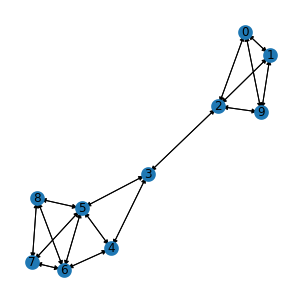

In [28]:
data_graph = to_networkx(DS[2]['graph'])
plt.figure(1,figsize = (4,4)) 
nx.draw(data_graph, cmap = plt.get_cmap('Set1'), node_size = 75, linewidths = 6, with_labels= True)
plt.show()

Supernode mapping 
- supernode 0 = [0,1,2,9] 
- supernode 1 = [3,4,5] 
- supernode 2 = [6,7,8] 

In [ ]:
# Let's create a graph
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[0],[0],[0]], dtype = torch.float)


In [ ]:
data = Data(x = x, edge_index = edge_index.t().contiguous())

In [ ]:
torch_geometric.utils.to_dense_adj(data.edge_index)

In [ ]:
# Plot the graph
data_graph = to_networkx(data)
plt.figure(1,figsize=(4,4)) 
nx.draw(data_graph, cmap = plt.get_cmap('Set1'), node_size=75, linewidths=6,with_labels= True)
plt.show()

In [ ]:
reduction = dict()

# Graveyard

In [ ]:
def BFS(node, item):
    adj_list = get_adj_list(item['adjacency_matrix'])
    visited = [] # List to keep track of visited nodes.
    queue = []     #Initialize a queue
    visited.append(n`ode)
    queue.append(node)

    while queue:
        s = queue.pop(0) 
        print (s, end = " ") 

        for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

In [ ]:
def cluster_baseline(item, n_hat):
    n = item['adjacency_matrix'].shape
    super_nodes = np.random.choice(range(n), n_hat, replace=False)
    

In [ ]:
test = dict()
test[1] = 1

In [ ]:
test

In [ ]:
super_node1 = np.array([])
super_node2 = np.array([])

In [ ]:
def get_subgraph(graph, node1, node2):
    
    